## Combination Creator

Generating combinations (sequences) from source data

In [100]:
from scipy.io import wavfile as wav
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pydub import AudioSegment
from pathlib import Path
from random import choice
from pydub.silence import split_on_silence

### Step: Shuffle

In [3]:
shuffle_path, shuffle_list = [], []

In [4]:
pathlist = Path('../../Source/Shuffle').glob('**/*.wav')
for path in pathlist:
    shuffle_path.append(path)

In [5]:
for i in range (len(shuffle_path)):
    shuffle_list.append(AudioSegment.from_wav(str(shuffle_path[i])))

### Step: Ball change

In [6]:
ball_change_path, ball_change_list = [], []

In [7]:
pathlist = Path('../../Source/Ball_change').glob('**/*.wav')
for path in pathlist:
    ball_change_path.append(path)

In [8]:
for i in range (len(ball_change_path)):
    ball_change_list.append(AudioSegment.from_wav(str(ball_change_path[i])))

###  25 "Random" Combinations (shuffle + ball change)

In [63]:
num_list = list(range(1,5))

In [64]:
shuffle_ball_change = []

In [65]:
for i in range (25):
    combination = choice(shuffle_list) * choice(num_list) + choice(ball_change_list) * choice(num_list)
    shuffle_ball_change.append(combination)
    combination.export('../../Source/Combi/Shuffle_ball_change/' + str(i+1) + '.wav', format='wav')

In [53]:
len(shuffle_ball_change)

25

In [80]:
shuffle_ball_change[11]

## Organize combinations in a DataFrame
(Sort by length of combination)

In [84]:
path_col = []

In [85]:
pathlist = Path('../../Source/Combi/Shuffle_ball_change').glob('**/*.wav')
for path in pathlist:
    path_col.append(path)

In [86]:
tap = pd.DataFrame({'Path':path_col})
tap['Length'] = [AudioSegment.from_wav(str(tap.loc[idx, 'Path'])).duration_seconds for idx in range(len(tap))] 
tap['Channels'] = [AudioSegment.from_wav(str(tap.loc[idx, 'Path'])).channels for idx in range(len(tap))]
tap['Sample_rate'] = [AudioSegment.from_wav(str(tap.loc[idx, 'Path'])).frame_rate for idx in range(len(tap))]
tap['Bit_depth'] = [AudioSegment.from_wav(str(tap.loc[idx, 'Path'])).sample_width*8 for idx in range(len(tap))]

In [87]:
tap = tap.sort_values(ascending=True, by=['Length'])
tap = tap.reset_index(drop=True)
tap

,Path,Length,Channels,Sample_rate,Bit_depth
0,../../Source/Combi/Shuffle_ball_change/7.wav,1.100000,1,44100,16
1,../../Source/Combi/Shuffle_ball_change/23.wav,1.199977,1,44100,16
2,../../Source/Combi/Shuffle_ball_change/19.wav,1.474989,1,44100,16
3,../../Source/Combi/Shuffle_ball_change/1.wav,1.933946,1,44100,16
4,../../Source/Combi/Shuffle_ball_change/18.wav,2.223968,1,44100,16
5,../../Source/Combi/Shuffle_ball_change/5.wav,2.265986,1,44100,16
6,../../Source/Combi/Shuffle_ball_change/8.wav,2.400000,1,44100,16
7,../../Source/Combi/Shuffle_ball_change/11.wav,2.400000,1,44100,16
8,../../Source/Combi/Shuffle_ball_change/22.wav,2.400000,1,44100,16
9,../../Source/Combi/Shuffle_ball_change/2.wav,2.465986,1,44100,16


What can I do with these combinations? Hmm... good question. 
- Visualize them (plot)
- Split them up into their component parts
- ???

In [88]:
def plot_waves (file, title):
    # Read the wav file (mono)
    samplingFrequency, signalData = wav.read(file)
    
    # Plot the signal read from wav file
    plt.subplot(211)
    plt.title(title)
    plt.plot(signalData[:])
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    plt.subplot(212)
    plt.specgram(signalData[:],Fs=samplingFrequency)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    return plt.show()

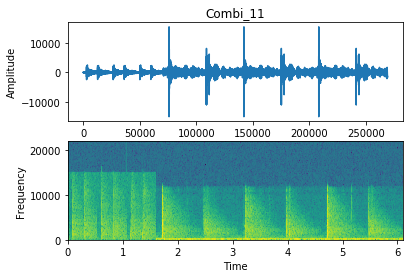

In [90]:
plot_waves('../../Source/Combi/Shuffle_ball_change/12.wav', 'Combi_11')

In [92]:
AudioSegment.from_wav('../../Source/Combi/Shuffle_ball_change/12.wav')

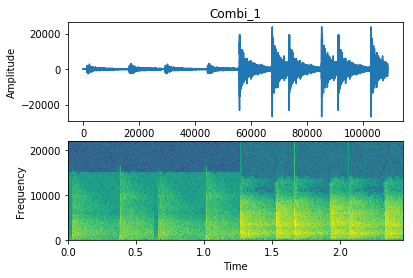

In [95]:
plot_waves('../../Source/Combi/Shuffle_ball_change/2.wav', 'Combi_1')

In [96]:
AudioSegment.from_wav('../../Source/Combi/Shuffle_ball_change/2.wav')

These look kinda weird. This might not be a good strategy.

In [101]:
def build_list(artist, clip_number, length):
    i = 1
    artist_list = []
    while i <= length :
        name = artist + "/" + str(clip_number) + "/" +str(i) + ".wav"
        artist_list.append(name)
        i += 1
    return artist_list

def split_silence_chunks(wavfile, silence_length, threshold, file_names_list):
    sound_file = AudioSegment.from_wav(wavfile)
    audio_chunks = split_on_silence(sound_file, 
                        min_silence_len=silence_length,
                        silence_thresh=threshold)
    for i in range (len(audio_chunks)) :
        chunk = audio_chunks[i]
        chunk.export(file_names_list[i], format='wav')
    print("Exported " + str(len(audio_chunks)) + " files")

In [122]:
split_silence_chunks('../../Source/Combi/Shuffle_ball_change/2.wav', 100, -42, 
                     build_list(artist='../../Source/Combi/Shuffle_ball_change/Chunks', clip_number=2, length=9))

Exported 5 files


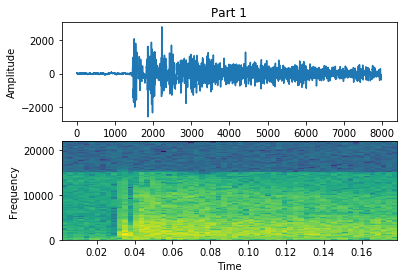

In [123]:
sound = AudioSegment.from_wav('../../Source/Combi/Shuffle_ball_change/Chunks/2/1.wav')
plot_waves('../../Source/Combi/Shuffle_ball_change/Chunks/2/1.wav', 'Part 1')

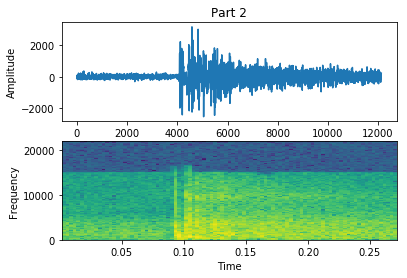

In [124]:
plot_waves('../../Source/Combi/Shuffle_ball_change/Chunks/2/2.wav', 'Part 2')

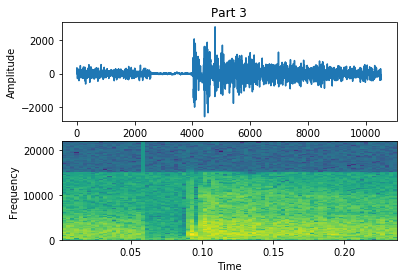

In [125]:
plot_waves('../../Source/Combi/Shuffle_ball_change/Chunks/2/3.wav', 'Part 3')

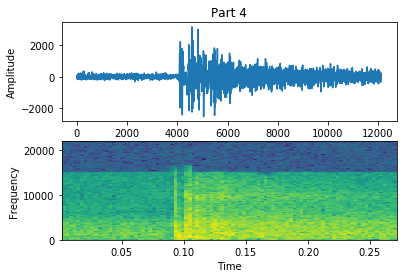

In [126]:
plot_waves('../../Source/Combi/Shuffle_ball_change/Chunks/2/4.wav', 'Part 4')

In [130]:
x = AudioSegment.from_wav('../../Source/Combi/Shuffle_ball_change/Chunks/2/4.wav')
x.dBFS

-39.03937699130614

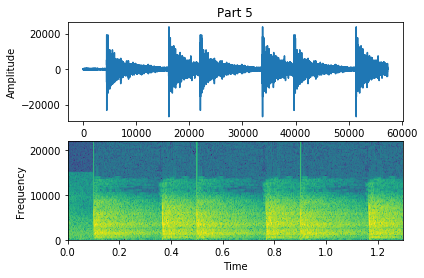

In [128]:
plot_waves('../../Source/Combi/Shuffle_ball_change/Chunks/2/5.wav', 'Part 5')

### This isn't working as I hoped. Function parameters need some editing